## Preprocessing of Age Attributes of COVID-19 Clinical Trials Data

Questions to ask regarding the age attribute:
1. What is the distribution of age groups?
2. Among the top countries with the most clincal trials, what is the age group distribution?

In [1]:
# load library
library(dplyr)
library(tidyverse)
library(viridis)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v stringr 1.4.0
v tidyr   1.1.2     v forcats 0.5.0
v readr   1.4.0     
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R v

In [2]:
# Read the cleaned data
data <- read.csv("MyCleanData.csv")
head(data)

X,Title,Status,Interventions,Gender,Age,Phases,Enrollment,Start.Date,Completion.Date,Last.Update.Posted,Locations,URL,MapCountry,Drugonly
1,Duvelisib to Combat COVID-19,Recruiting,Drug: Duvelisib|Procedure: Peripheral blood draw|Drug: Placebo,All,"18 Years and older Â (Adult, Older Adult)",Phase 2,28,"October 12, 2020","April 30, 2022","November 9, 2020","Washington University School of Medicine, Saint Louis, Missouri, United States",https://ClinicalTrials.gov/show/NCT04372602,United States,Duvelisib|Placebo
2,Observational Cohort of COVID-19 Patients at Raymond-Poincare,Recruiting,,All,"18 Years and older Â (Adult, Older Adult)",,500,"May 7, 2020",June 2020,"May 14, 2020","Department of Infectiology, Raymond PoincarÃ© Hospital, APHP, Garches, France",https://ClinicalTrials.gov/show/NCT04364698,France,
3,Decitabine for Coronavirus (COVID-19) Pneumonia- Acute Respiratory Distress Syndrome (ARDS) Treatment: DART Trial,Recruiting,Drug: Decitabine|Other: Placebo Saline,All,"18 Years and older Â (Adult, Older Adult)",Phase 2,40,"September 14, 2020",July 2021,"September 25, 2020","Johns Hopkins University, Baltimore, Maryland, United States",https://ClinicalTrials.gov/show/NCT04482621,United States,Decitabine
4,COVID-19 Surveillance Based on Smart Wearable Device,Not yet recruiting,,All,"18 Years to 75 Years Â (Adult, Older Adult)",,200,"July 1, 2020","March 10, 2021","July 7, 2020","Peking University First Hospital, Beijing, Beijing, China",https://ClinicalTrials.gov/show/NCT04459637,China,
5,A Phase 2 Trial of Infliximab in Coronavirus Disease 2019 (COVID-19).,Recruiting,Drug: Infliximab,All,"18 Years and older Â (Adult, Older Adult)",Phase 2,17,"June 1, 2020",December 2020,"June 11, 2020","Tufts Medical Center, Boston, Massachusetts, United States",https://ClinicalTrials.gov/show/NCT04425538,United States,Infliximab
6,Safety & Performance Evaluation of Seraph 100 in Treatment of Pts With COVID-19,Not yet recruiting,Device: Seraph 100,All,"18 Years to 90 Years Â (Adult, Older Adult)",Not Applicable,42,"December 15, 2020","April 15, 2021","November 27, 2020","Carla Kikken-Jussen, Vaals, Limburg, Netherlands",https://ClinicalTrials.gov/show/NCT04547257,Netherlands,


In [3]:
# Add empty columns of each age group
data['AgeChild'] <- NA
data['AgeAdult'] <- NA
data['AgeOlderAdult'] <- NA

In [4]:
# Fill the newly created columns with Yes's and No's according to the Age column
data$AgeChild <- ifelse(grepl("Child", data$Age),"Yes", "No")
data$AgeAdult <- ifelse(grepl("Adult", data$Age),"Yes", "No")
data$AgeOlderAdult <- ifelse(grepl("Older Adult", data$Age),"Yes", "No")

In [5]:
# Check for missing values
sum(is.na(data$AgeChild))
sum(is.na(data$AgeAult))
sum(is.na(data$AgeOlderAdult))

[1] 0

[1] 0

[1] 0

In [6]:
# Create a new data frame consisting of related variables
age_data <- select(data, MapCountry, AgeChild, AgeAdult, AgeOlderAdult)

In [7]:
# Check the data frame
head(age_data,10)

MapCountry,AgeChild,AgeAdult,AgeOlderAdult
United States,No,Yes,Yes
France,No,Yes,Yes
United States,No,Yes,Yes
China,No,Yes,Yes
United States,No,Yes,Yes
Netherlands,No,Yes,Yes
Undefined,No,Yes,Yes
India,No,Yes,Yes
"Iran, Islamic Republic of",Yes,Yes,Yes
Turkey,No,Yes,Yes


In [8]:
# Remove Undefined countries from the data
age_data <- subset(age_data, MapCountry != "Undefined")

In [9]:
# Count the occurences of Yes and No in each Age Group column
table(age_data$AgeChild)
table(age_data$AgeAdult)
table(age_data$AgeOlderAdult)


  No  Yes 
3007  646 


  No  Yes 
  44 3609 


  No  Yes 
 289 3364 

In [10]:
# Find the top 10 countries with the most recorded trials
sort(table(age_data$MapCountry), decreasing = TRUE)[1:10]


 United States         France          Italy United Kingdom          China 
           736            540            172            170            161 
         Egypt          Spain         Canada         Turkey         Brazil 
           145            137            136            130            115 

In [11]:
# Count Yes's in each age group in the United States
age_dataUSA <- filter(age_data, MapCountry == "United States")
ageUSA_Child <- sum(age_dataUSA$AgeChild == "Yes")
ageUSA_Adult <- sum(age_dataUSA$AgeAdult == "Yes")
ageUSA_OlderAdult <- sum(age_dataUSA$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the France
age_dataFRA <- filter(age_data, MapCountry == "France")
ageFRA_Child <- sum(age_dataFRA$AgeChild == "Yes")
ageFRA_Adult <- sum(age_dataFRA$AgeAdult == "Yes")
ageFRA_OlderAdult <- sum(age_dataFRA$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the Italy
age_dataITA <- filter(age_data, MapCountry == "Italy")
ageITA_Child <- sum(age_dataITA$AgeChild == "Yes")
ageITA_Adult <- sum(age_dataITA$AgeAdult == "Yes")
ageITA_OlderAdult <- sum(age_dataITA$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the United Kingdom
age_dataUK <- filter(age_data, MapCountry == "United Kingdom")
ageUK_Child <- sum(age_dataUK$AgeChild == "Yes")
ageUK_Adult <- sum(age_dataUK$AgeAdult == "Yes")
ageUK_OlderAdult <- sum(age_dataUK$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the China
age_dataCHI <- filter(age_data, MapCountry == "China")
ageCHI_Child <- sum(age_dataCHI$AgeChild == "Yes")
ageCHI_Adult <- sum(age_dataCHI$AgeAdult == "Yes")
ageCHI_OlderAdult <- sum(age_dataCHI$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the Egypt
age_dataEGY <- filter(age_data, MapCountry == "Egypt")
ageEGY_Child <- sum(age_dataEGY$AgeChild == "Yes")
ageEGY_Adult <- sum(age_dataEGY$AgeAdult == "Yes")
ageEGY_OlderAdult <- sum(age_dataEGY$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the Spain
age_dataSPA <- filter(age_data, MapCountry == "Spain")
ageSPA_Child <- sum(age_dataSPA$AgeChild == "Yes")
ageSPA_Adult <- sum(age_dataSPA$AgeAdult == "Yes")
ageSPA_OlderAdult <- sum(age_dataSPA$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the Canada
age_dataCAN <- filter(age_data, MapCountry == "Canada")
ageCAN_Child <- sum(age_dataCAN$AgeChild == "Yes")
ageCAN_Adult <- sum(age_dataCAN$AgeAdult == "Yes")
ageCAN_OlderAdult <- sum(age_dataCAN$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the Turkey
age_dataTUR <- filter(age_data, MapCountry == "Turkey")
ageTUR_Child <- sum(age_dataTUR$AgeChild == "Yes")
ageTUR_Adult <- sum(age_dataTUR$AgeAdult == "Yes")
ageTUR_OlderAdult <- sum(age_dataTUR$AgeOlderAdult == "Yes")

# Count Yes's in each age group in the Brazil
age_dataBRA <- filter(age_data, MapCountry == "Brazil")
ageBRA_Child <- sum(age_dataBRA$AgeChild == "Yes")
ageBRA_Adult <- sum(age_dataBRA$AgeAdult == "Yes")
ageBRA_OlderAdult <- sum(age_dataBRA$AgeOlderAdult == "Yes")

In [12]:
# Calculate the number of recorded trials done by the top 10 countries
n1 <- nrow(age_dataUSA)
n2 <- nrow(age_dataFRA)
n3 <- nrow(age_dataITA)
n4 <- nrow(age_dataUK)
n5 <- nrow(age_dataCHI)
n6 <- nrow(age_dataEGY)
n7 <- nrow(age_dataSPA)
n8 <- nrow(age_dataCAN)
n9 <- nrow(age_dataTUR)
n10 <- nrow(age_dataBRA)

### Visualization

There are 646 child trials, 3609 adult trials, and 3364 older adult trials.

Now, let's visualize the distribution of age group among all countries that did clinical trials.

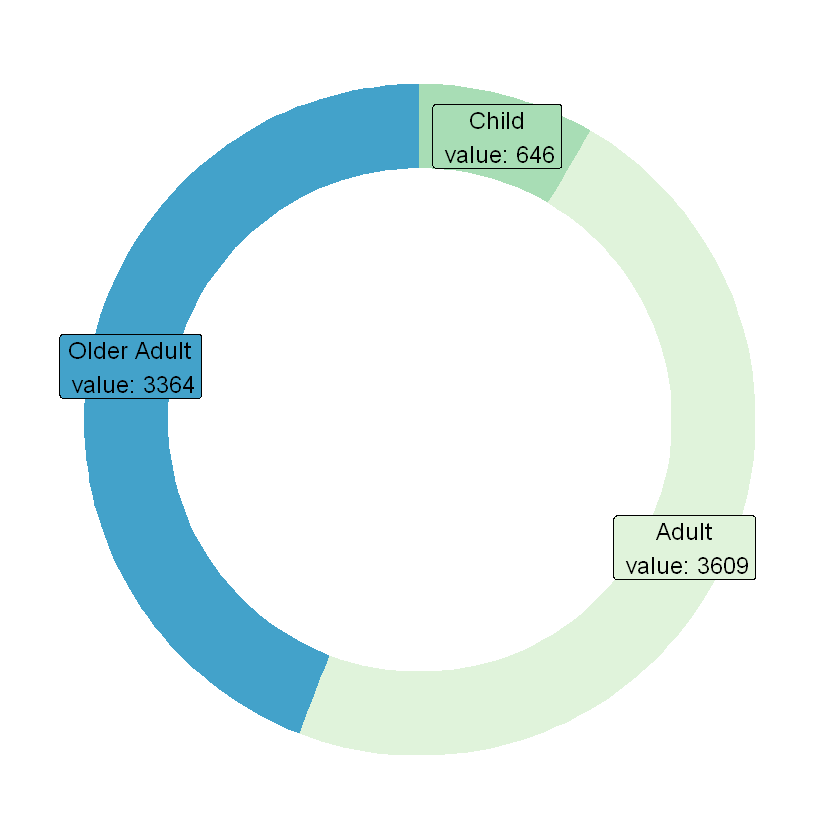

In [13]:
# Create data frame for the visualization
data <- data.frame(
  category=c("Child", "Adult", "Older Adult"),
  count=c(646, 3609, 3364)
)
 
# Compute percentages
data$fraction <- data$count / sum(data$count)

# Compute the cumulative percentages (top of each rectangle)
data$ymax <- cumsum(data$fraction)

# Compute the bottom of each rectangle
data$ymin <- c(0, head(data$ymax, n=-1))

# Compute label position
data$labelPosition <- (data$ymax + data$ymin) / 2

# Compute a good label
data$label <- paste0(data$category, "\n value: ", data$count)

# Make the plot
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3.5, fill=category)) +
  geom_rect() +
  geom_label( x=3.75, aes(y=labelPosition, label=label), size=5) +
  scale_fill_brewer(palette=4) +
  coord_polar(theta="y") +
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "none")

Now, let's visualize the distribution of trials in the top 10 countries with the most clinical trials.

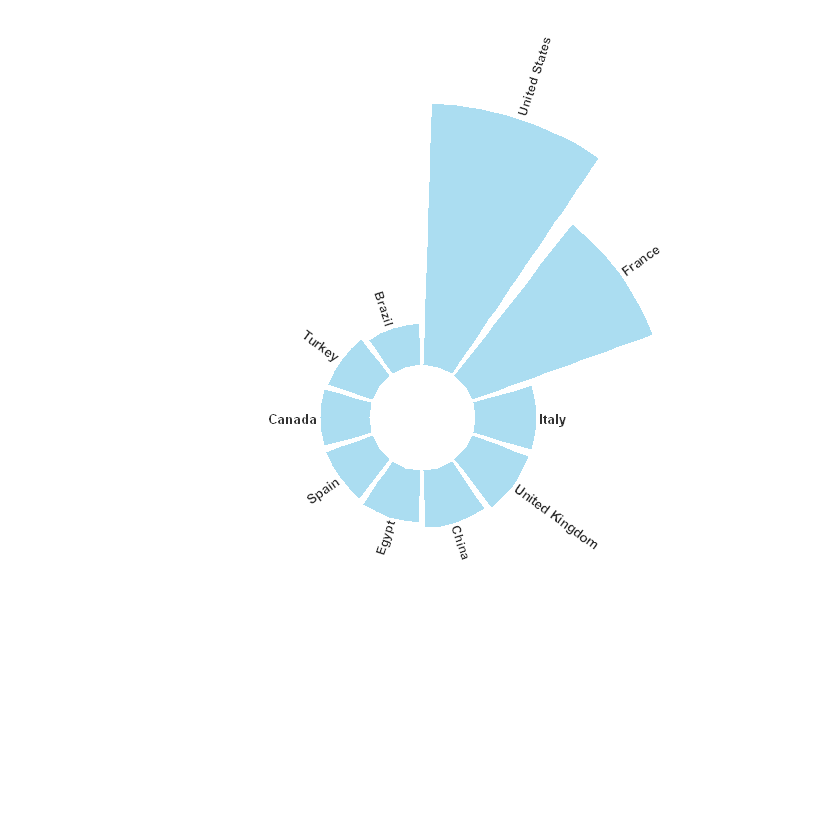

In [17]:
# Create dataset
id <- seq(1:10)
individual <- c("United States","France","Italy","United Kingdom",
                   "China","Egypt","Spain","Canada","Turkey","Brazil")
value <- c(736,540,172,170,161,145,137,136,130,115) # Values taken from previous calculation
data <- data.frame(id,individual,value)

# Get the name and the y position of each label
label_data <- data
 
# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (label_data$id-0.5) /number_of_bar
# Substracted 0.5 because the letter must have the angle of the center of the bars. 
# Not extreme right(1) or extreme left (0).
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse( angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)
 
# Start the plot
p1 <- ggplot(data, aes(x=as.factor(id), y=value)) + 
# Note that id is a factor. If x is numeric, there is some space between the first bar
  
# This add the bars with a blue color
geom_bar(stat="identity", fill=alpha("skyblue", 0.7)) +
  
# Limits of the plot = very important. The negative value controls the size of the inner circle, 
# the positive one is useful to add size over each bar.
ylim(-150,900) +
  
# Custom the theme: no axis title and no cartesian grid
theme_minimal() +
theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") # Adjust the margin to make in sort labels are not truncated!
  ) +
  
# This makes the coordinate polar instead of cartesian.
coord_polar(start = 0) +
  
# Add the labels, using the label_data dataframe that we have created before
geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), 
          color="black", fontface="bold",alpha=0.8, size=2.7, angle= label_data$angle, inherit.aes = FALSE ) 

show(p1)

Now, let's visualize the distribution of age group in each top 10 countries with the most clinical trials.

Warning message:
"Removed 9 rows containing missing values (position_stack)."Warning message:
"Removed 9 rows containing missing values (position_stack)."Warning message:
"Removed 9 rows containing missing values (geom_text)."

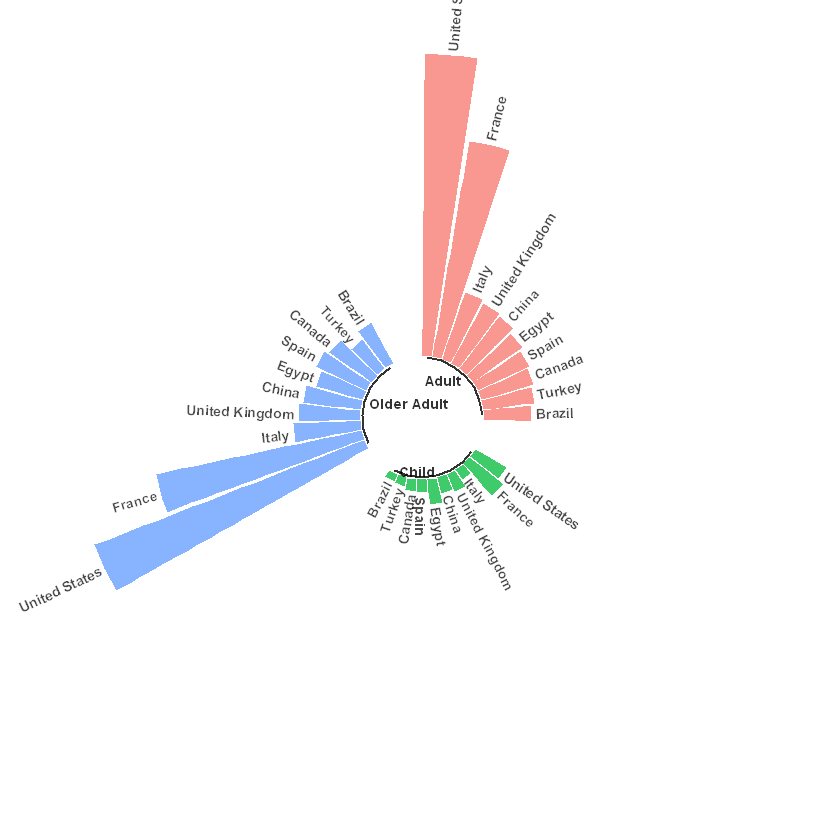

In [16]:
# Create dataset
id <- seq(1:30)
individual <- c("United States","France","Italy","United Kingdom",
                "China","Egypt","Spain","Canada","Turkey","Brazil",
                "United States","France","Italy","United Kingdom",
                "China","Egypt","Spain","Canada","Turkey","Brazil",
                "United States","France","Italy","United Kingdom",
                "China","Egypt","Spain","Canada","Turkey","Brazil")
group <- c( rep('Child', 10), rep('Adult', 10), rep('Older Adult', 10))
value <- c(86,104,28,46,39,61,32,29,21,18,
           729,529,171,164,159,145,137,132,124,115,
           700,508,163,149,141,118,135,123,88,110)
data <- data.frame(id,individual,group,value)

# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 3
to_add <- data.frame( matrix(NA, empty_bar*nlevels(data$group), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(levels(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar
# Substracted 0.5 because the letter must have the angle of the center of the bars.
# Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 
# Make the plot
p3 <- ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +       
# Note that id is a factor. If x is numeric, there is some space between the first bar
  
geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  
geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
ylim(-150,750) +
theme_minimal() +
theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", 
            fontface="bold",alpha=0.7, size=3.0, angle= label_data$angle, inherit.aes = FALSE ) +
  
# Add base line information
geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", 
               alpha=0.8, size=0.7 , inherit.aes = FALSE )  +
geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0), colour = "black", 
            alpha=0.8, size=3, fontface="bold", inherit.aes = FALSE)

show(p3)